https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://machinelearningmastery.com/time-series-data-stationary-python/

#  What is Time Series?
- TS is a collection of data points collected at constant time intervals. 
- These are analyzed to determine the long term trend so as to forecast the future or perform some other form of analysis. 

## But what makes a TS different from say a regular regression problem? 

There are 2 things:
- It is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
data_path = 'C://Users//vipatha//02_ScientificStack_0719//Time Series//TS_Analysis_Data/AirPassengers.csv'
df = pd.read_csv(data_path)
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# 2. Regular Data Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [5]:
df.columns = ['Month', 'Passengers']
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null datetime64[ns]
Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [10]:
df.set_index('Month', inplace=True)

In [11]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
ts = df
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


# 3. How to Check Stationarity of a Time Series?

The observations in a stationary time series are not dependent on time.

Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

- Stationary Process: A process that generates a stationary series of observations.
- Stationary Model: A model that describes a stationary series of observations.
- Trend Stationary: A time series that does not exhibit a trend.
- Seasonal Stationary: A time series that does not exhibit seasonality.
- Strictly Stationary: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

##### Rule of thumbs 
If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.

our first step in an analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

- constant mean
- constant variance
- an autocovariance that does not depend on time.

'In general, a stationary time series will have no predictable patterns in the long-term. Time plots will show the series to be roughly horizontal (although some cyclic behaviour is possible), with constant variance.'

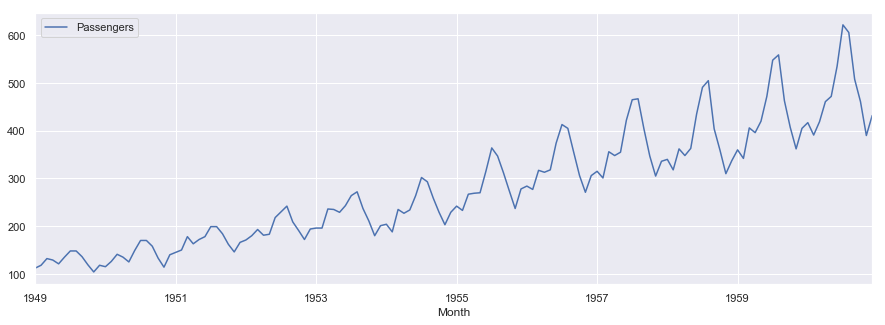

In [16]:
ts.plot(figsize=(15,5)) # visually we can confirm that the TS has trend and seasonaility.Thereby not Stationary 

#### The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [23]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
series = Series.from_csv(data_path, header=0)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**Null hypothese stays true. We will reject alternative hypothesis**

Null hypothese is data is time dependent and hence non-stationary

# 4. How to make a Time Series Stationary?

"differencing",
- where you look at the difference between successive data points 
- (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).


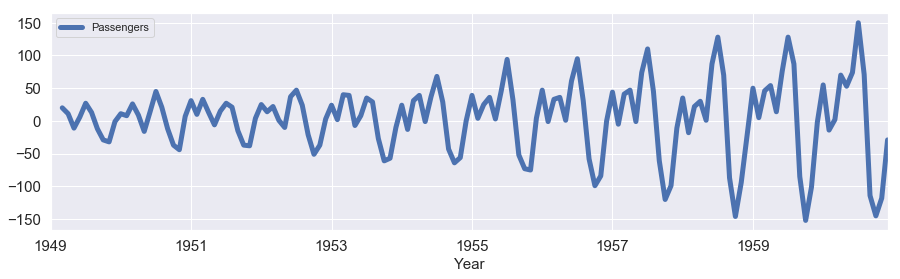

In [60]:
ts_diff = ts.diff(2)
ts_diff.plot(figsize=(15,4), linewidth=5, fontsize=15)
plt.xlabel('Year', fontsize=15);


In [61]:
ts_diff.head(3)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,20.0


In [62]:
ts_diff = ts_diff.dropna()

In [63]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts_diff['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.961695
p-value: 0.038630
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**First order: Although P value is little over 0.05, i will assume this is close to stationary and move to forecasting**

**Second Order: P < 0.05. Great!**

# 5. Forecasting a Time Series

In [57]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  142
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -704.048
Method:                       css-mle   S.D. of innovations             34.323
Date:                Sat, 20 Jul 2019   AIC                           1422.097
Time:                        22:01:20   BIC                           1442.787
Sample:                    03-01-1949   HQIC                          1430.504
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1327      1.089     -0.122      0.903      -2.268       2.002
ar.L1.D.Passengers    -0.3852      0.085     -4.557      0.000      -0.551      -0.220
ar.L2.D.Passengers  

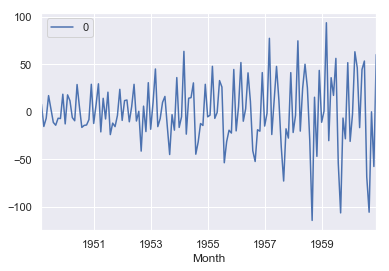

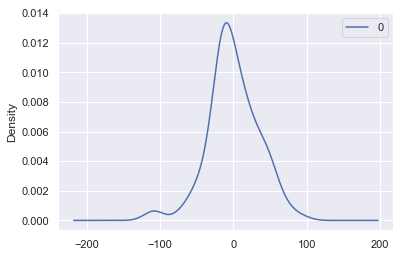

                0
count  142.000000
mean     0.000946
std     34.457718
min   -114.080105
25%    -18.162204
50%     -4.478495
75%     20.155053
max     93.661814


In [59]:
# fit model
model = ARIMA(ts_diff, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

**we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals)**



In [65]:
# 1,1,1 ARIMA Model
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Sat, 20 Jul 2019   AIC                           1402.145
Time:                        22:38:22   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.Passengers  

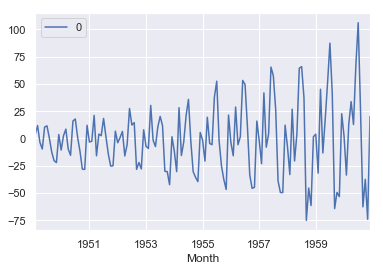

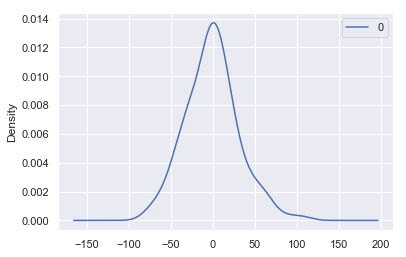

                0
count  143.000000
mean    -1.061668
std     31.603302
min    -75.134611
25%    -22.076070
50%     -1.510249
75%     15.949339
max    106.080904


In [66]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

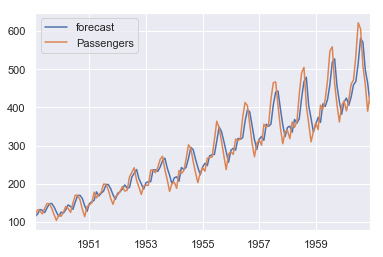

In [67]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [69]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = ts[:90]
test = ts[90:]

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


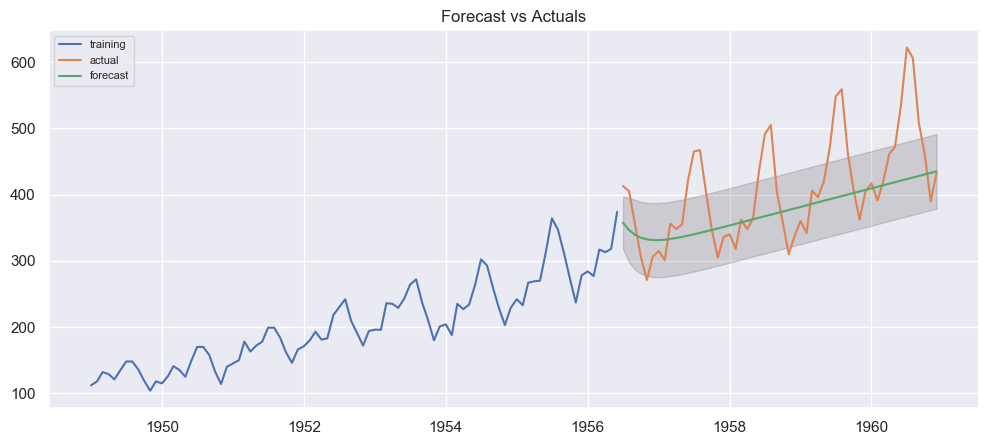

In [71]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(54, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement

 increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


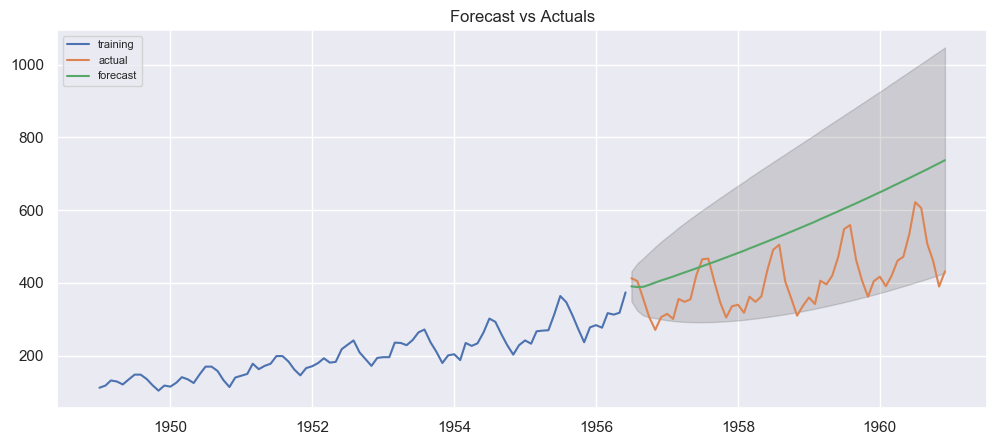

In [73]:
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(54, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [76]:
# 1,1,1 ARIMA Model
model = ARIMA(ts, order=(3,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\vipatha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.